#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re



# Load your dataset
df = pd.read_csv(r'C:\Users\Sama Elshazly\Downloads\Salaries.csv')
df


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


## Basic Data Exploration

In [267]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


## Descriptive Statistics

In [269]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## Data Cleaning

#### The "Notes" and "Status" columns are null, and there is no need for these, so we will proceed to drop them.


In [270]:
df = df.drop(['Notes' , 'Status'] , axis=1)

#### We will eliminate any row that does not contain a value in the "EmployeeName" column.

In [271]:
df = df.drop(df[df['EmployeeName'] == 'Not provided'].index)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


#### We will fill the null values in the "benefits" column with the minimum available value

In [272]:
min_value = df['Benefits'].median()
df['Benefits'].fillna(value= min_value  , inplace = True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


## Basic Data Visualization

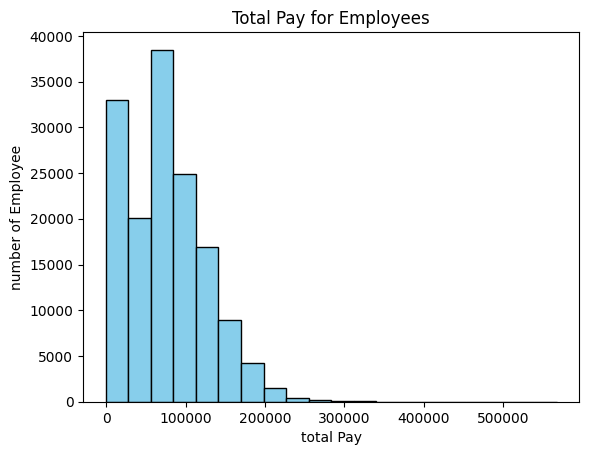

In [273]:

plt.hist( df['TotalPay'], bins=20, color='skyblue' , edgecolor='black')
plt.xlabel('total Pay')
plt.ylabel('number of Employee')
plt.title('Total Pay for Employees')
plt.show()


In [274]:
def extract(job_title):
    match = re.search('\((.*)\)', job_title)
    return match.group(1).strip() if match else 'unknown'  # grou(1) = take the first match experssion found , stri() = to remove any white space..etc

df['Department'] = df['JobTitle'].apply(extract) 

pie_df = df[df['Department'] != 'unknown']

department_counts = pie_df['Department'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_12372\1012202160.py:2: SyntaxWarning: invalid escape sequence '\('
  match = re.search('\((.*)\)', job_title)


In [275]:
department_counts

Department
Civil/Criminal       1126
POLICE DEPARTMENT     667
CIVIL/CRIMINAL        377
MFCC                   90
Seasonal               86
SFERS                  64
FIRE DEPARTMENT        52
Police Department      45
SEASONAL               30
Fire Dept              25
Civil & Criminal       14
Cvl&Crmnl               9
CIVIL & CRIMINAL        8
Fire Department         1
Name: count, dtype: int64

In [276]:
department_counts["Fire Department"]=department_counts["Fire Department"]+ department_counts["FIRE DEPARTMENT"]+department_counts["Fire Dept"]
department_counts["Seasonal"] = department_counts["Seasonal"] + department_counts["SEASONAL"] 
department_counts['Police Department']=department_counts["Police Department"]+department_counts["POLICE DEPARTMENT"]
department_counts['Civil/Criminal'] = department_counts["Civil/Criminal"]+department_counts['CIVIL & CRIMINAL']+department_counts["CIVIL/CRIMINAL"]+department_counts["Cvl&Crmnl"]
department_counts.drop(["FIRE DEPARTMENT", "Fire Dept", "SEASONAL", "POLICE DEPARTMENT", "CIVIL & CRIMINAL", "CIVIL/CRIMINAL" , "Civil/Criminal" , "Cvl&Crmnl"], inplace=True, errors='ignore')
department_counts


Department
MFCC                  90
Seasonal             116
SFERS                 64
Police Department    712
Civil & Criminal      14
Fire Department       78
Name: count, dtype: int64

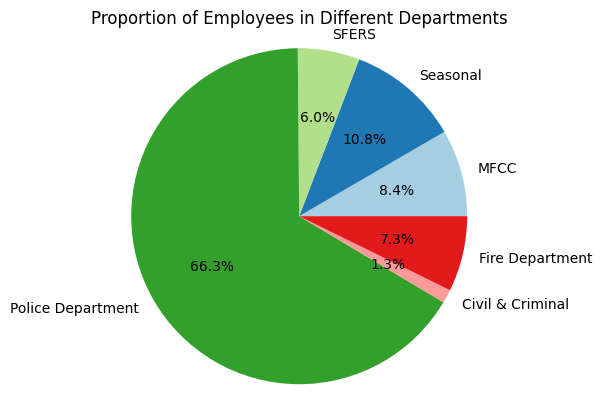

In [277]:
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.axis('equal') 
plt.title('Proportion of Employees in Different Departments')
plt.show()

## Grouped Analysis 

In [278]:
dep= df.groupby('Department')
dep.first()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
Department,,,,,,,,,,,
CIVIL & CRIMINAL,139,JESSE SMITH,CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL),213907.72,0.00,1080.96,28628.62,214988.68,214988.68,2011,San Francisco
CIVIL/CRIMINAL,592,VAN LY,ATTORNEY (CIVIL/CRIMINAL),153221.52,0.00,29538.27,28628.62,182759.79,182759.79,2011,San Francisco
Civil & Criminal,36346,Burk Delventhal,Chief Atty1 (Civil & Criminal),206752.00,0.00,312.50,64406.22,207064.50,271470.72,2012,San Francisco
Civil/Criminal,36817,James Taylor Rowland,Attorney (Civil/Criminal),180896.46,0.00,312.50,56935.27,181208.96,238144.23,2012,San Francisco
Cvl&Crmnl,36266,Marisa Moret,"Cfdntal Chf Atty 2,(Cvl&Crmnl)",214883.94,0.00,3008.00,70458.13,217891.94,288350.07,2012,San Francisco
FIRE DEPARTMENT,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco
Fire Department,102304,Robert E Evans,"Captain, (Fire Department)",NaN,0.00,35332.78,0.00,35332.78,35332.78,2013,San Francisco
Fire Dept,36169,David Franklin,Asst Chf of Dept (Fire Dept),204032.52,85503.16,26193.09,58486.10,315728.77,374214.87,2012,San Francisco
MFCC,9963,MARCELLA CROSLEY,"MARRIAGE, FAMILY & CHILD COUNSELOR (MFCC)",79901.02,8606.11,8905.95,28628.62,97413.08,97413.08,2011,San Francisco


In [279]:
jop_t = df.groupby("JobTitle")
jop_t.first()

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Department
JobTitle,,,,,,,,,,,
ACCOUNT CLERK,20766,NAPOLEON VIRAY,60838.20,0.00,0.00,28628.62,60838.20,60838.20,2011,San Francisco,unknown
ACCOUNTANT,19264,CARLITO NEPACENA,65392.01,0.00,0.00,28628.62,65392.01,65392.01,2011,San Francisco,unknown
ACCOUNTANT INTERN,21536,PENG HUANG,58501.72,0.00,297.81,28628.62,58799.53,58799.53,2011,San Francisco,unknown
"ACPO,JuvP, Juv Prob (SFERS)",135284,Palminder K Hernandez,62290.78,0.00,0.00,17975.59,62290.78,80266.37,2014,San Francisco,SFERS
ACUPUNCTURIST,18379,WEN XU,66374.40,0.00,1220.00,28628.62,67594.40,67594.40,2011,San Francisco,unknown
...,...,...,...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,12940,DELBERT LEE,59969.74,23016.22,2091.44,28628.62,85077.40,85077.40,2011,San Francisco,unknown
X-Ray Laboratory Aide,49777,Delbert Lee,61690.51,25152.51,1703.05,31612.76,88546.07,120158.83,2012,San Francisco,unknown
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",23392,MARIO YEDIDIA,52609.91,0.00,1022.96,28628.62,53632.87,53632.87,2011,San Francisco,unknown


In [280]:

job_pay=df.groupby('Department')['TotalPay'].mean()
job_pay



Department
CIVIL & CRIMINAL     181415.143750
CIVIL/CRIMINAL       128056.733820
Civil & Criminal     203727.389286
Civil/Criminal       137961.430036
Cvl&Crmnl            215085.310000
FIRE DEPARTMENT      221158.444615
Fire Department       35332.780000
Fire Dept            276063.426400
MFCC                  67517.330222
POLICE DEPARTMENT    158810.073568
Police Department    152696.334444
SEASONAL               7488.975667
SFERS                 87697.342344
Seasonal              10043.225814
unknown               73675.415698
Name: TotalPay, dtype: float64

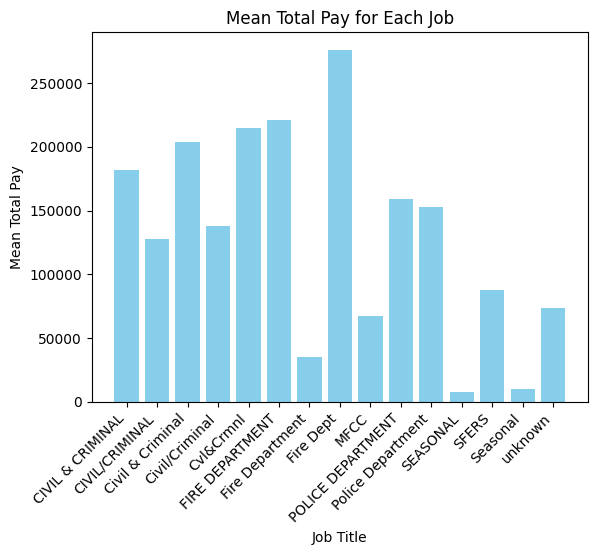

In [286]:

plt.bar(job_pay.index, job_pay, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Mean Total Pay')
plt.title('Mean Total Pay for Each Job')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Simple Correlation Analysis

In [282]:
correlation = df["TotalPay"].corr(df["Benefits"])
correlation

0.7735900989526109

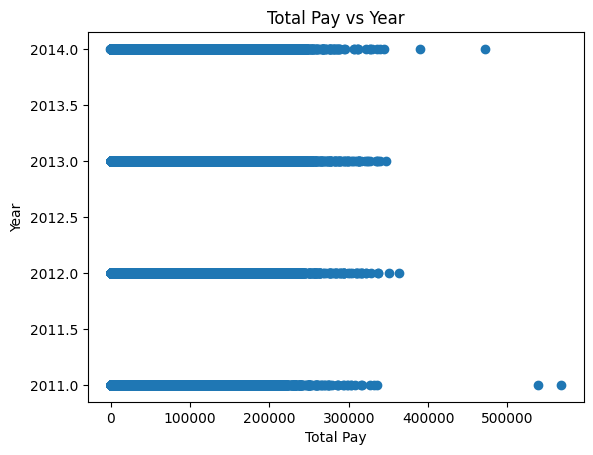

In [283]:
fig, ax = plt.subplots()
ax.scatter(df["TotalPay"], df['Year'])
plt.xlabel('Total Pay')
plt.ylabel('Year')
plt.title('Total Pay vs Year')
plt.show()

## Summary

##### Upon initial analysis of the dataset, two columns were identified as containing null values. In order to proceed with meaningful analyses, a decision was made to address and clean the data by handling these null entries. This process was crucial to ensure the reliability of subsequent analytical tasks.

##### Furthermore, it was observed that the data required careful handling during the cleaning phase. The presence of null values and variations in the methods used to fill records added complexity to the extraction process. This variance in data quality and filling techniques necessitated a meticulous approach to ensure accurate and consistent results.

##### The need for data cleaning and the observed discrepancies in filling methodologies highlight the importance of data quality assurance. Addressing these issues lays the groundwork for more reliable and meaningful analyses, fostering a more accurate understanding of the underlying trends and patterns in the dataset

# Good Luck!